In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

#Importing Models
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# importing metrics and traintestsplit
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('/content/smoke_detection_iot.csv')

In [ ]:
df

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.00,0.000,0.000,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.00,0.000,0.000,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.00,0.000,0.000,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.00,0.000,0.000,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.00,0.000,0.000,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,62625,1655130047,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,5739,0
62626,62626,1655130048,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,5740,0
62627,62627,1655130049,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,5741,0
62628,62628,1655130050,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,5742,0


In [ ]:
df.drop(columns = ['Unnamed: 0','UTC','CNT'],inplace = True)

In [ ]:
df.describe()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm
count,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000
mean,15.970424,48.539499,1942.057528,670.021044,12942.453936,19754.257912,938.627649,100.594309,184.467770,491.463608,203.586487,80.049042,0.714626
std,14.359576,8.865367,7811.589055,1905.885439,272.464305,609.513156,1.331344,922.524245,1976.305615,4265.661251,2214.738556,1083.383189,0.451596
min,-22.010000,10.740000,0.000000,400.000000,10668.000000,15317.000000,930.852000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.994250,47.530000,130.000000,400.000000,12830.000000,19435.000000,938.700000,1.280000,1.340000,8.820000,1.384000,0.033000,0.000000
50%,20.130000,50.150000,981.000000,400.000000,12924.000000,19501.000000,938.816000,1.810000,1.880000,12.450000,1.943000,0.044000,1.000000
75%,25.409500,53.240000,1189.000000,438.000000,13109.000000,20078.000000,939.418000,2.090000,2.180000,14.420000,2.249000,0.051000,1.000000
max,59.930000,75.200000,60000.000000,60000.000000,13803.000000,21410.000000,939.861000,14333.690000,45432.260000,61482.030000,51914.680000,30026.438000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature[C]  62630 non-null  float64
 1   Humidity[%]     62630 non-null  float64
 2   TVOC[ppb]       62630 non-null  int64  
 3   eCO2[ppm]       62630 non-null  int64  
 4   Raw H2          62630 non-null  int64  
 5   Raw Ethanol     62630 non-null  int64  
 6   Pressure[hPa]   62630 non-null  float64
 7   PM1.0           62630 non-null  float64
 8   PM2.5           62630 non-null  float64
 9   NC0.5           62630 non-null  float64
 10  NC1.0           62630 non-null  float64
 11  NC2.5           62630 non-null  float64
 12  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(5)
memory usage: 6.2 MB


<Axes: >

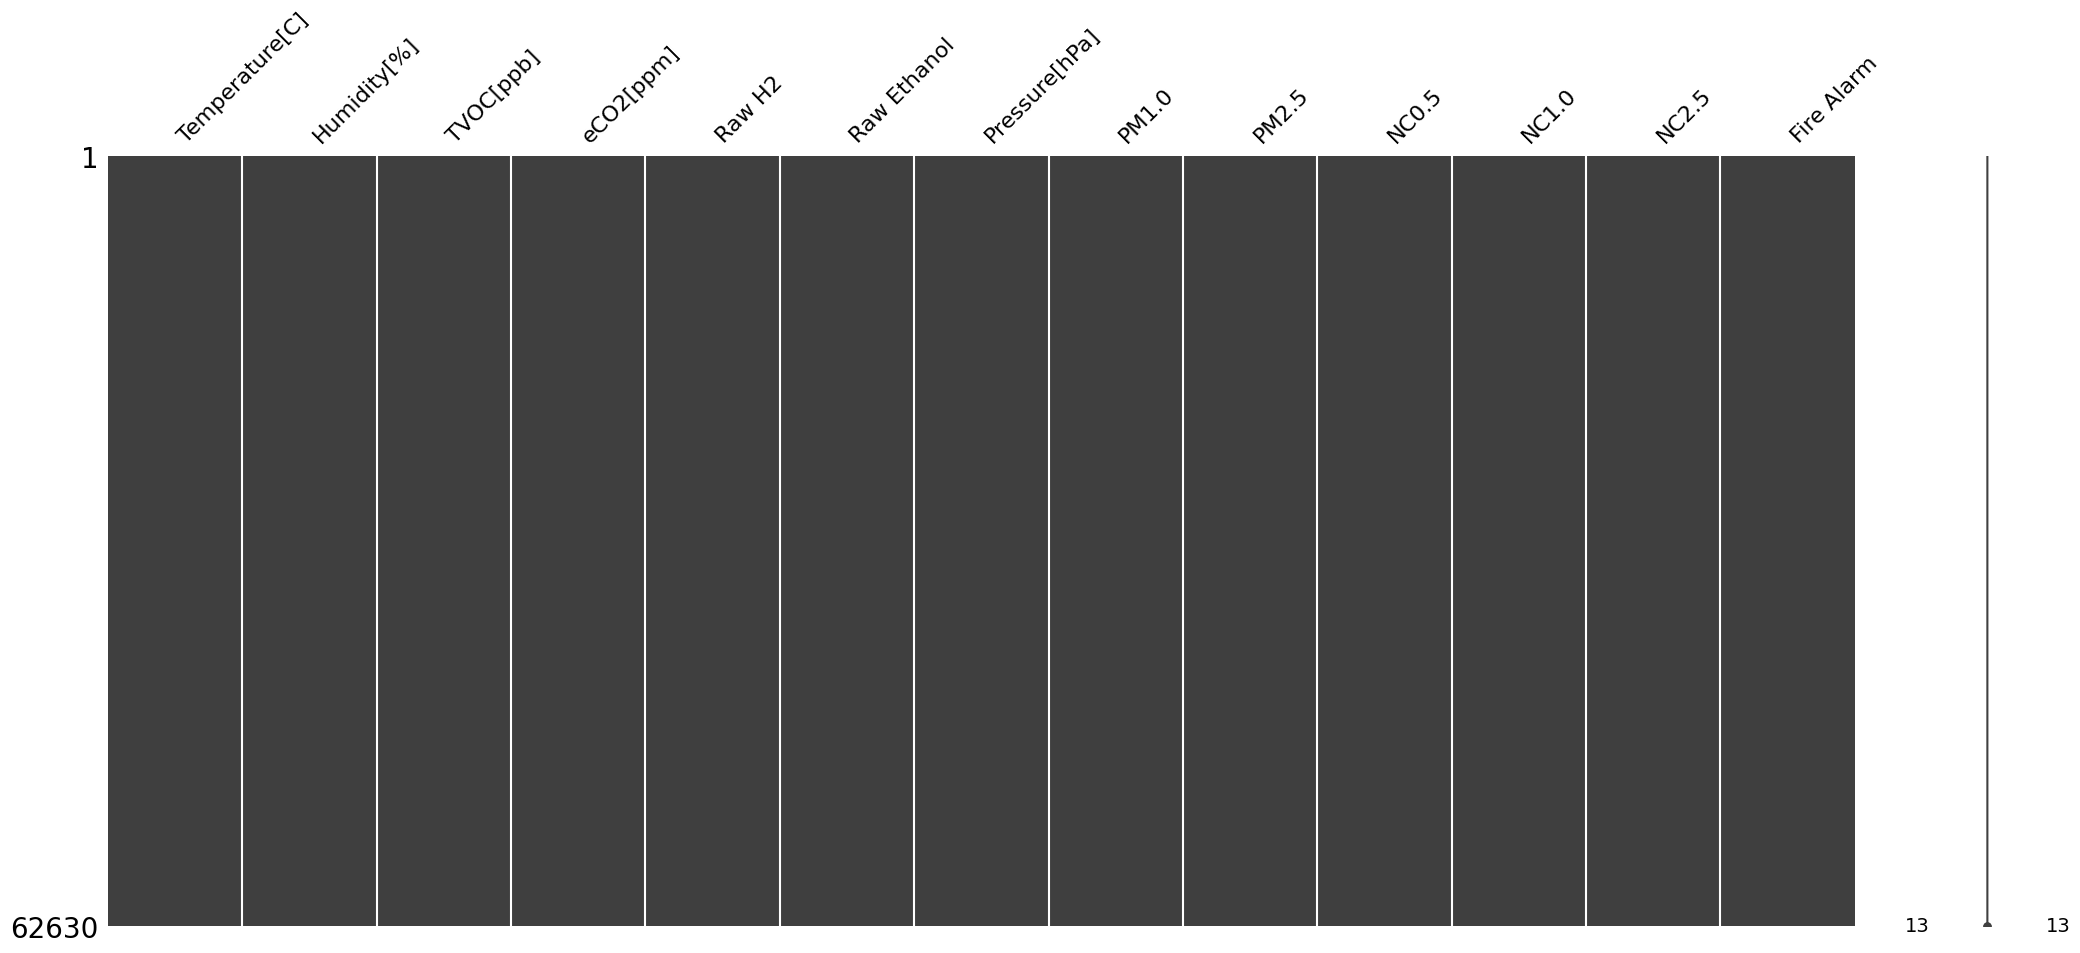

In [ ]:
msno.matrix(df)

In [ ]:
df.sample(4)

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm
24481,-1.740,54.32,1253,400,13002,19410,938.797,1.56,1.62,10.73,1.674,0.038,1
50895,37.690,14.60,167,2074,12668,20449,930.913,0.85,0.89,5.88,0.917,0.021,1
51442,27.220,44.06,32,407,12839,20748,937.592,2.22,2.31,15.27,2.381,0.054,0
23620,-19.649,52.63,1398,417,12970,19380,938.722,1.53,1.59,10.50,1.637,0.037,1


<Axes: ylabel='count'>

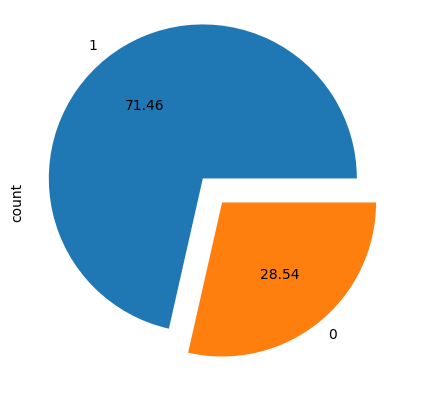

In [ ]:
fig = plt.figure(figsize = (15,5))
myexplode = [0.2, 0]
df['Fire Alarm'].value_counts().plot(kind ='pie',autopct = '%.2f',explode = myexplode)

<ipython-input-44-2f00eb99e4f1>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i],hist = False)
<ipython-input-44-2f00eb99e4f1>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i],hist = False)
<ipython-input-44-2f00eb99e4f1>:9: UserWarning: 

`distplot` is a deprecated

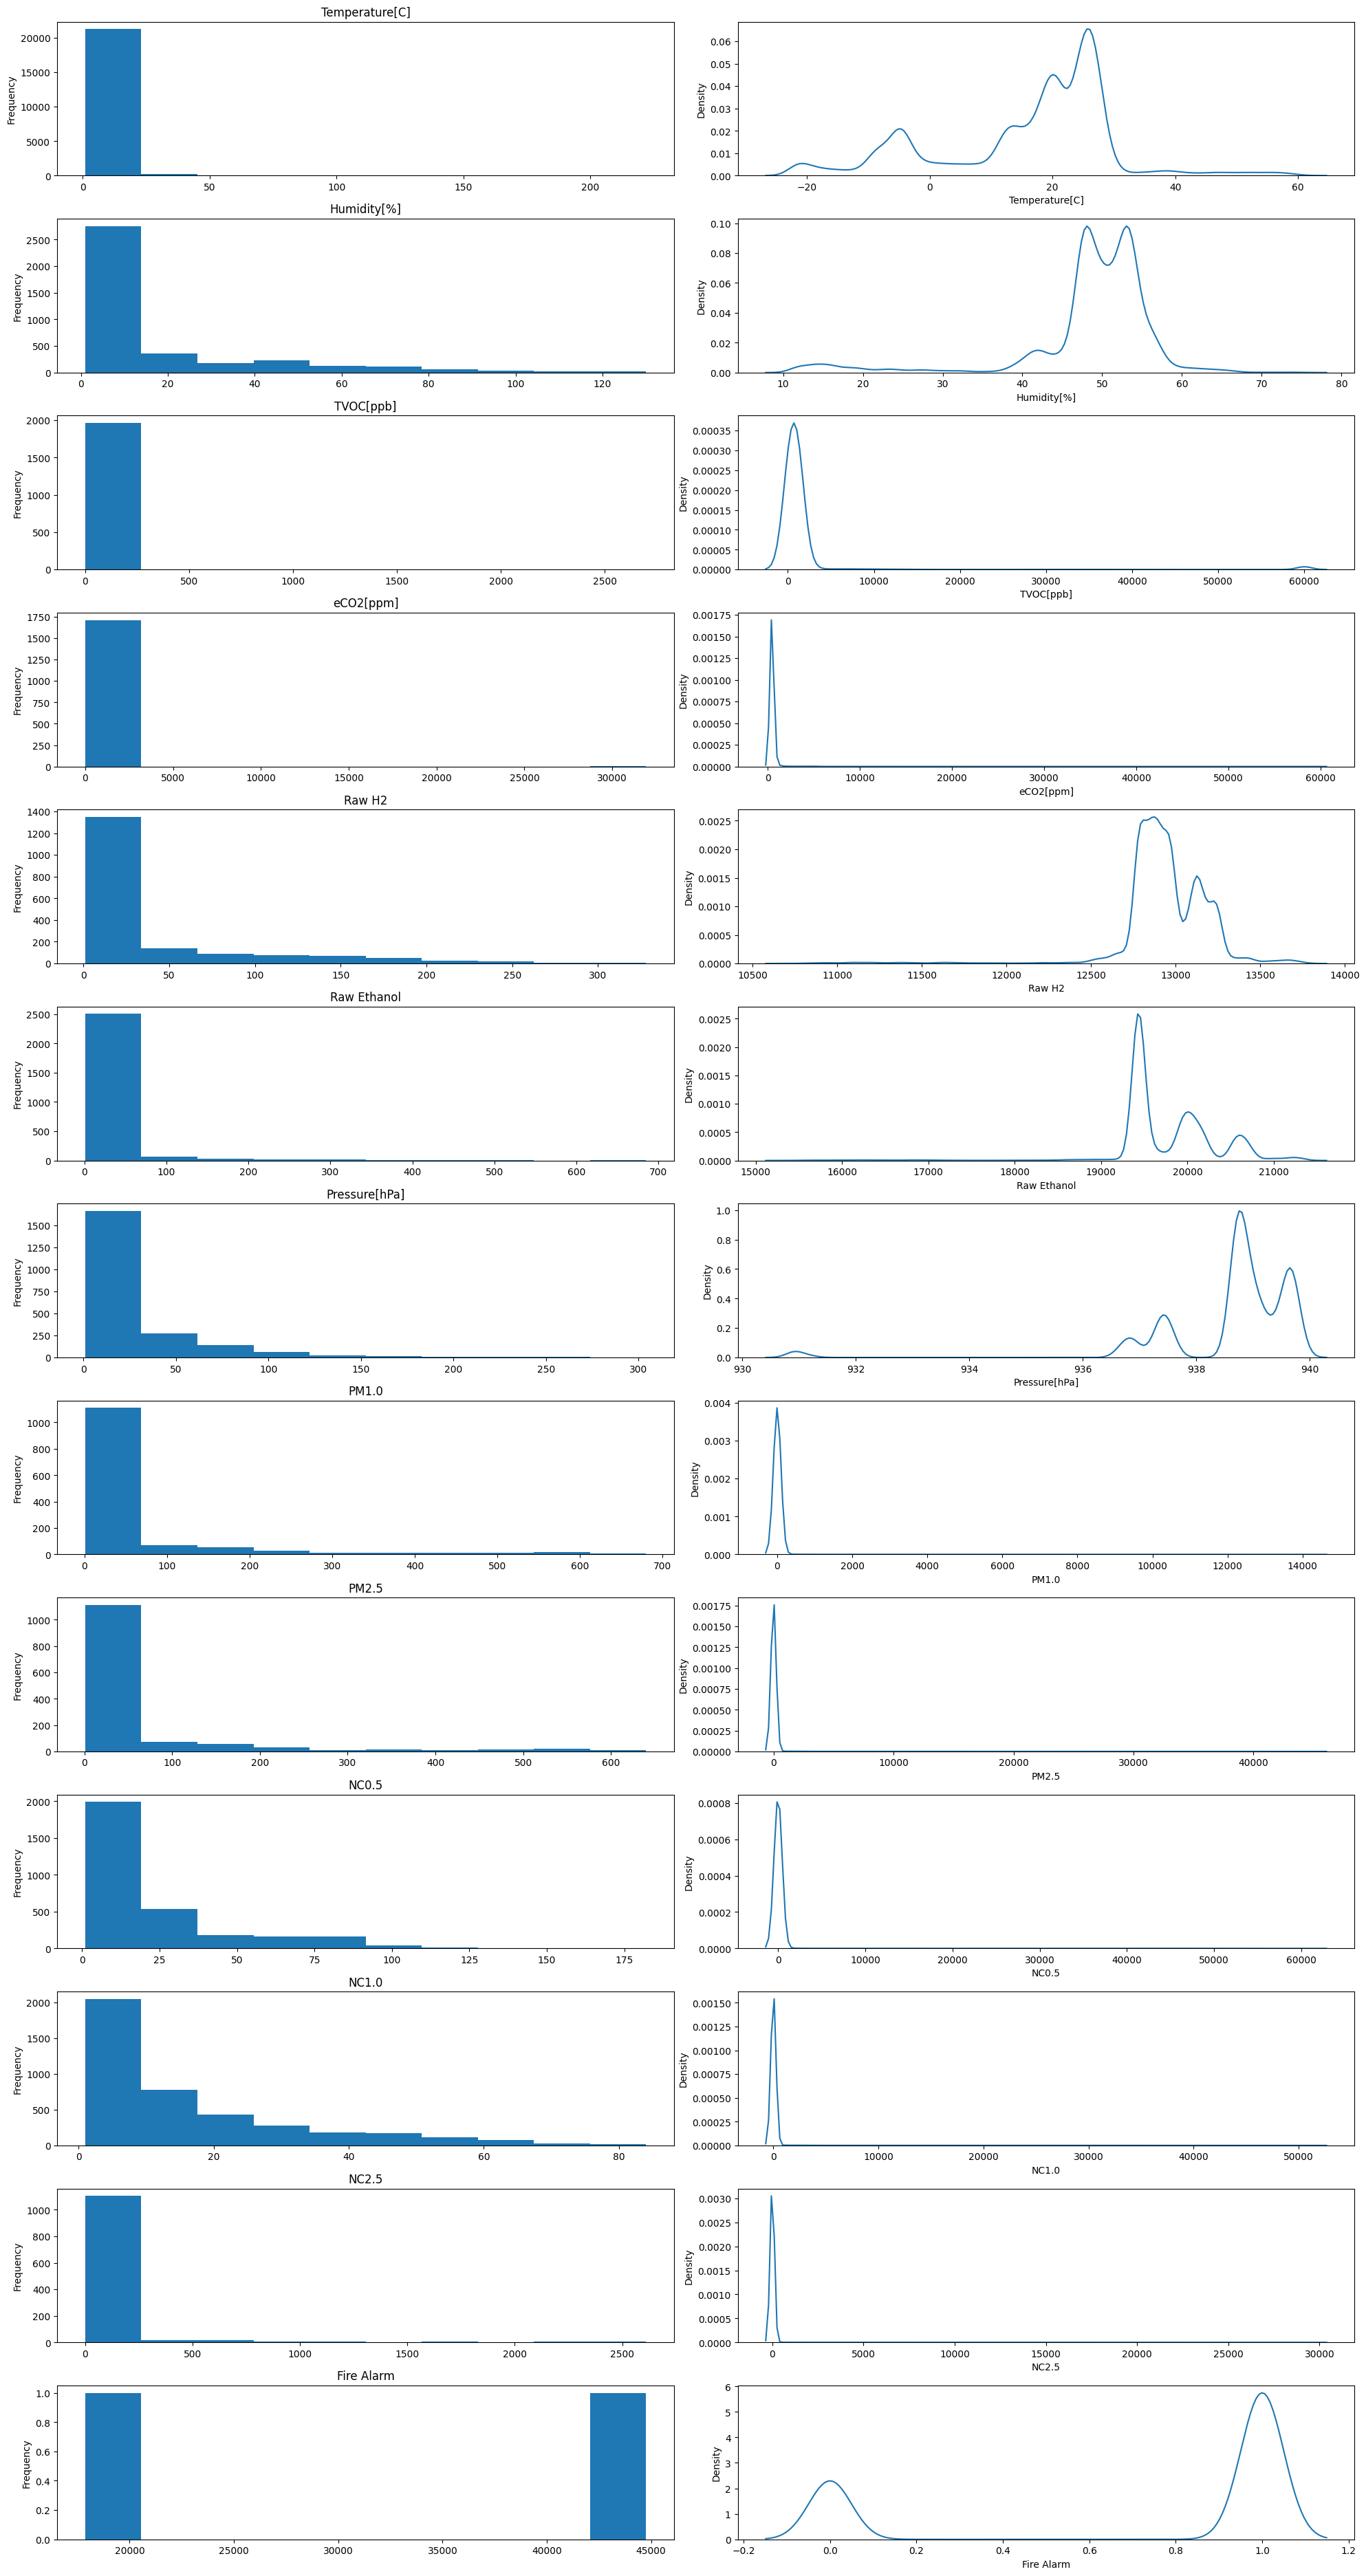

In [ ]:
j =1
fig = plt.figure(figsize = (20,40))
for i in df.columns:
    plt.subplot(14,2,j)
    df[i].value_counts().plot(kind ='hist')
    j=j+1
    plt.title(i)
    plt.subplot(14,2,j)
    sns.distplot(df[i],hist = False)
    j = j+1

plt.tight_layout()

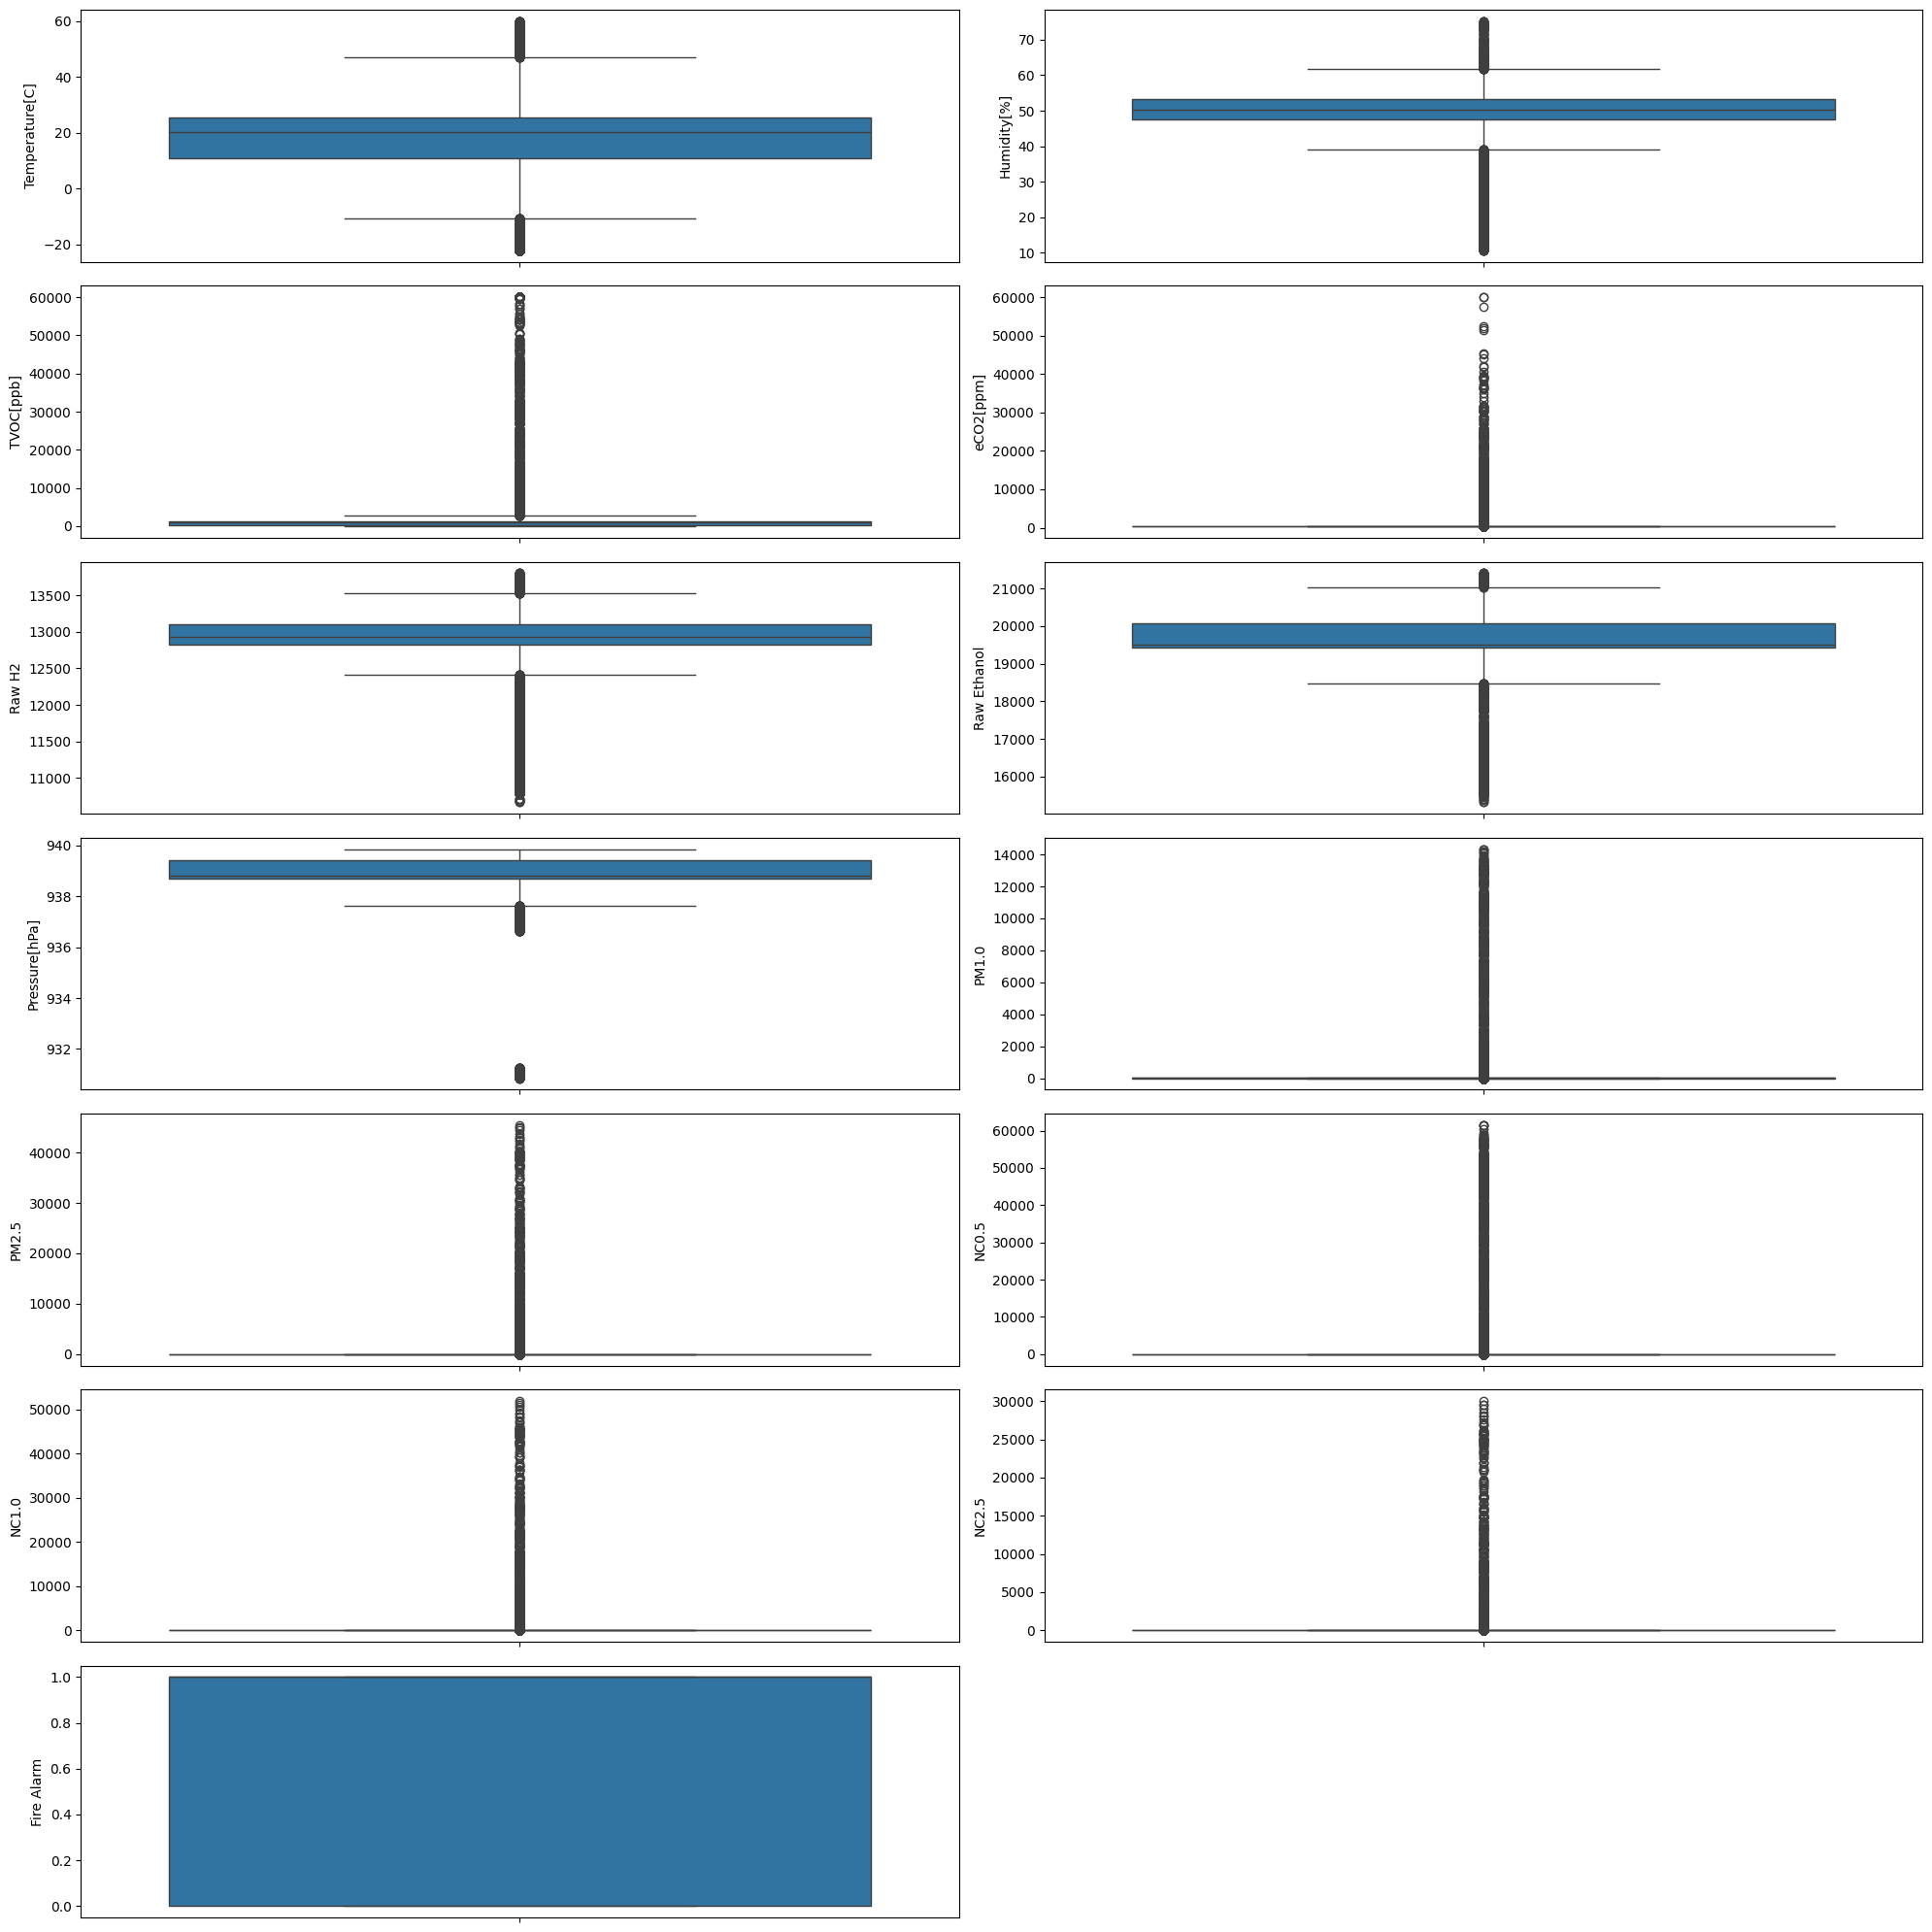

In [ ]:
j =1
plt.figure(figsize = (20,20))
for i in df.columns:
    plt.subplot(7,2,j)
    sns.boxplot(df[i])
    j=j+1
plt.tight_layout()

In [ ]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm
Temperature[C],1.000000,-0.243986,0.082442,0.079265,-0.135540,-0.037343,-0.251203,0.037330,0.032084,0.039291,0.031608,0.025526,-0.163902
Humidity[%],-0.243986,1.000000,-0.488878,-0.369095,0.247199,0.068782,0.694614,-0.236538,-0.178882,-0.277389,-0.174224,-0.118502,0.399846
TVOC[ppb],0.082442,-0.488878,1.000000,0.606118,-0.653053,-0.673715,-0.220004,0.597366,0.477424,0.670657,0.467386,0.344721,-0.214743
eCO2[ppm],0.079265,-0.369095,0.606118,1.000000,-0.682785,-0.506695,-0.326043,0.665482,0.572691,0.699604,0.564252,0.456323,-0.097006
Raw H2,-0.135540,0.247199,-0.653053,-0.682785,1.000000,0.631495,0.303090,-0.530714,-0.431079,-0.587769,-0.422626,-0.318518,0.107007
Raw Ethanol,-0.037343,0.068782,-0.673715,-0.506695,0.631495,1.000000,-0.075926,-0.480698,-0.393192,-0.529186,-0.385720,-0.293351,-0.340652
Pressure[hPa],-0.251203,0.694614,-0.220004,-0.326043,0.303090,-0.075926,1.000000,-0.258938,-0.243071,-0.248657,-0.241148,-0.213390,0.249797
PM1.0,0.037330,-0.236538,0.597366,0.665482,-0.530714,-0.480698,-0.258938,1.000000,0.956118,0.940045,0.949860,0.854901,-0.110552
PM2.5,0.032084,-0.178882,0.477424,0.572691,-0.431079,-0.393192,-0.243071,0.956118,1.000000,0.798873,0.999787,0.969382,-0.084916
NC0.5,0.039291,-0.277389,0.670657,0.699604,-0.587769,-0.529186,-0.248657,0.940045,0.798873,1.000000,0.786274,0.626711,-0.128118


<ipython-input-48-0d8d948f4193>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Fire Alarm", y="eCO2[ppm]", data=df, palette=['paleturquoise', 'lightcoral'])


<Axes: xlabel='Fire Alarm', ylabel='eCO2[ppm]'>

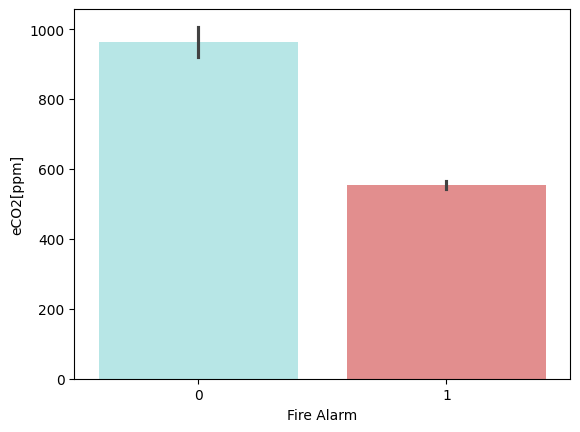

In [ ]:
sns.barplot(x="Fire Alarm", y="eCO2[ppm]", data=df, palette=['paleturquoise', 'lightcoral'])

<Axes: xlabel='Fire Alarm', ylabel='TVOC[ppb]'>

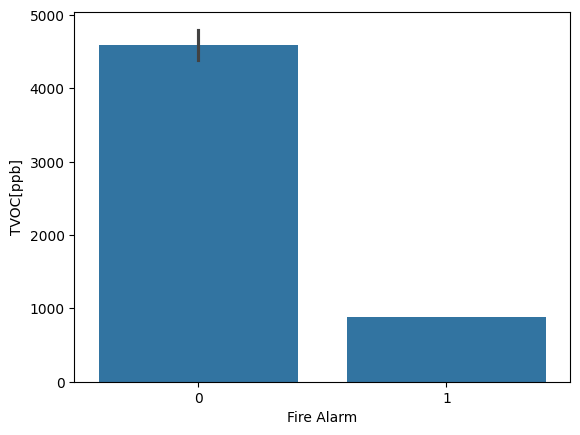

In [ ]:
# sns.barplot(df['Fire Alarm'] , df['TVOC[ppb]'])

sns.barplot(x='Fire Alarm', y='TVOC[ppb]', data=df)


<ipython-input-50-538337836d9b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Fire Alarm' , y= 'Humidity[%]',data=df, palette = ['darkturquoise', 'lightsalmon'])


<Axes: xlabel='Fire Alarm', ylabel='Humidity[%]'>

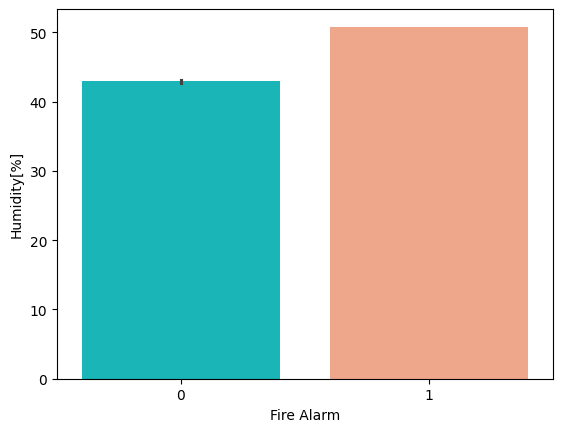

In [ ]:
sns.barplot(x='Fire Alarm' , y= 'Humidity[%]',data=df, palette = ['darkturquoise', 'lightsalmon'])


<ipython-input-51-9fce58d5ad2f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Fire Alarm' , y='PM1.0',data = df,palette = ['aquamarine', 'coral'])
<ipython-input-51-9fce58d5ad2f>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Fire Alarm' , y='PM2.5',data = df,palette = ['aquamarine', 'coral'])


<Axes: xlabel='Fire Alarm', ylabel='PM2.5'>

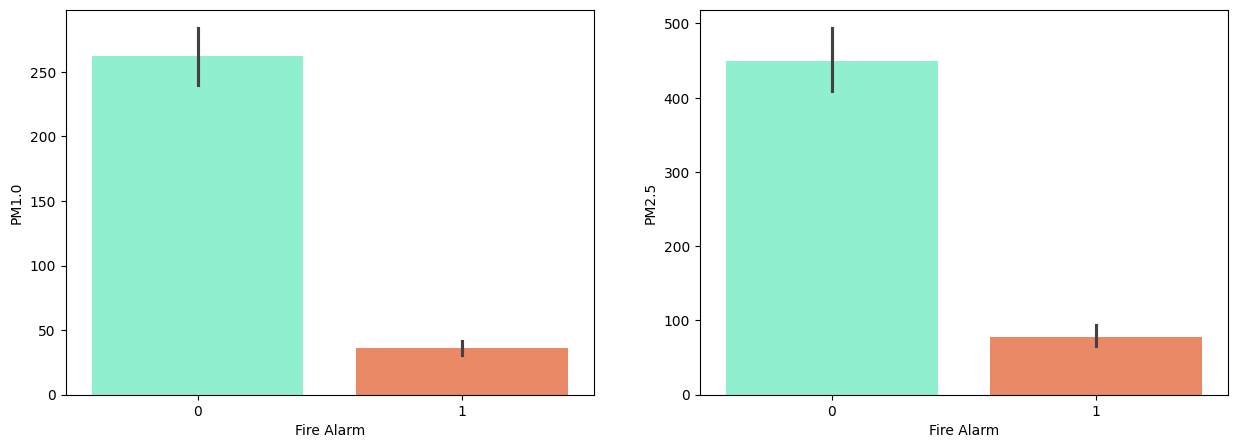

In [ ]:
fig = plt.figure(figsize=(15,5))
plt.subplot(121)
sns.barplot(x='Fire Alarm' , y='PM1.0',data = df,palette = ['aquamarine', 'coral'])
plt.subplot(122)
sns.barplot(x='Fire Alarm' , y='PM2.5',data = df,palette = ['aquamarine', 'coral'])

<ipython-input-52-4d401366b583>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Fire Alarm' , y='NC0.5',data = df ,palette = ['lightseagreen', 'darkslategray'])
<ipython-input-52-4d401366b583>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Fire Alarm' , y='NC1.0',data = df ,palette = ['lightseagreen', 'darkslategray'])
<ipython-input-52-4d401366b583>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Fire Alarm' , y='NC2.5',data = df ,palette = ['lightseagreen', 'darkslategray'])


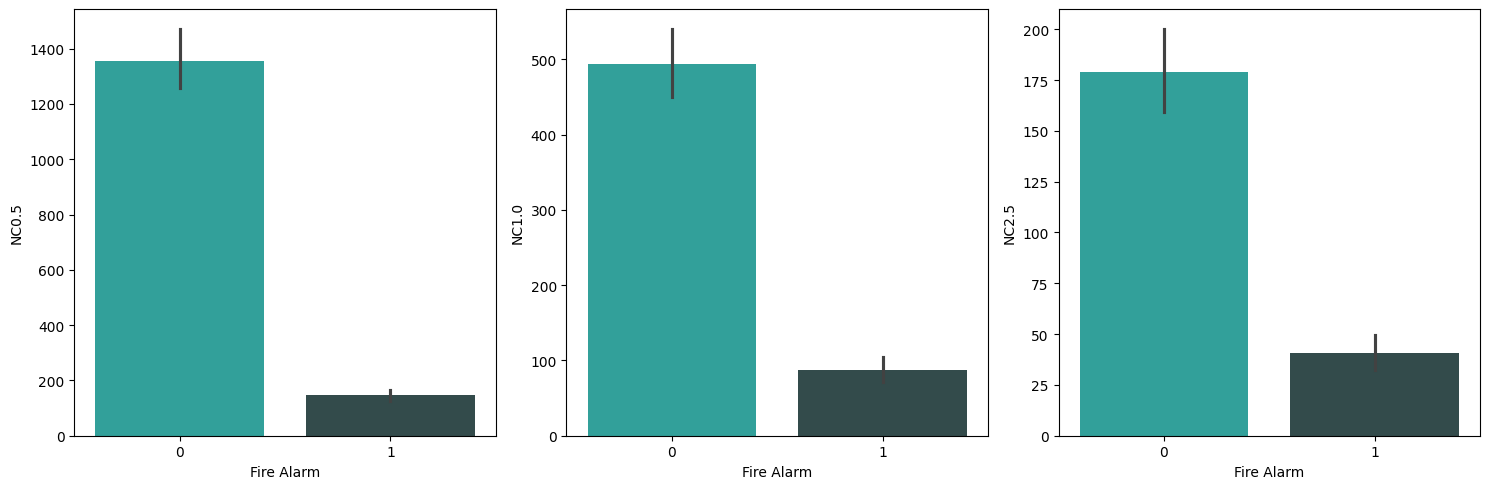

In [ ]:
fig = plt.figure(figsize=(15,5))
plt.subplot(131)

sns.barplot(x='Fire Alarm' , y='NC0.5',data = df ,palette = ['lightseagreen', 'darkslategray'])
plt.subplot(132)

sns.barplot(x='Fire Alarm' , y='NC1.0',data = df ,palette = ['lightseagreen', 'darkslategray'])
plt.subplot(133)

sns.barplot(x='Fire Alarm' , y='NC2.5',data = df ,palette = ['lightseagreen', 'darkslategray'])
plt.tight_layout()

In [ ]:
X = df.drop(columns ='Fire Alarm')
y= df['Fire Alarm']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2 ,random_state =12)

In [ ]:
sc = StandardScaler()
sc.fit_transform(X_train)
sc.transform(X_test)

array([[ 0.00876823, -0.08602724, -0.09351218, ..., -0.1119315 ,
        -0.09050366, -0.07286244],
       [ 0.62388041,  0.40015406, -0.09209826, ..., -0.11241825,
        -0.09065176, -0.07286896],
       [ 0.617613  ,  0.44208578, -0.09891077, ..., -0.11182151,
        -0.09047039, -0.07286058],
       ...,
       [ 1.14477242, -3.45756425, -0.22989091, ..., -0.11360706,
        -0.09101266, -0.07288573],
       [ 2.79658505, -4.15567073,  1.63930748, ...,  0.07050647,
        -0.02823523, -0.06163648],
       [ 0.74853238,  0.01710213, -0.07975862, ..., -0.11134645,
        -0.09032594, -0.07285405]])

In [ ]:
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test,y_pred) * 100

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


88.28037681622226

In [ ]:
model = KNeighborsClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test,y_pred) * 100

99.96008302730321

In [ ]:
model = RandomForestClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test,y_pred) * 100

100.0